In [1]:
import numpy as np
import matplotlib.pyplot as plt
from radporo import simulate

In [28]:
# Define the parameters
params = {
    'K': 9e9,       # Bulk modulus (Pa)
    'G': 3e9,       # Shear modulus (Pa)
    'rho': 1000,    # Fluid density (kg/m^3)
    'g': 9.81,
    'alpha': 0.8,   # Biot's coefficient
    'S': 1e-10,     # Storage coefficient (1/Pa)
    'k': 1e-15,     # Permeability (m^2)
    'a': 0.149,     # Inner radius (m)
    'b': 0.150,     # Outer radius (m)
    'N_r': 100,     # Number of spatial grid points
    'N_t': 150,     # Number of time steps
    'T': 1000.0     # Total simulation time (s)
}

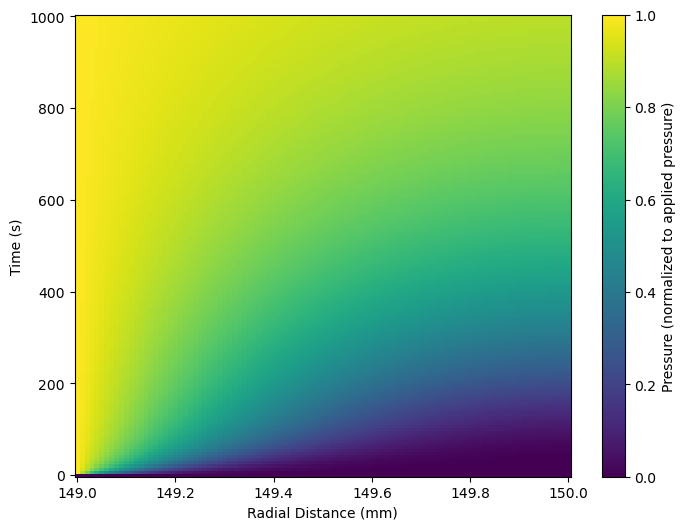

In [29]:
# Run the simulation
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the results
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(R*1e3, t, p_all, shading='auto')
plt.xlabel('Radial Distance (mm)')
plt.ylabel('Time (s)')
plt.colorbar(c, label='Pressure (normalized to applied pressure)')
plt.show()

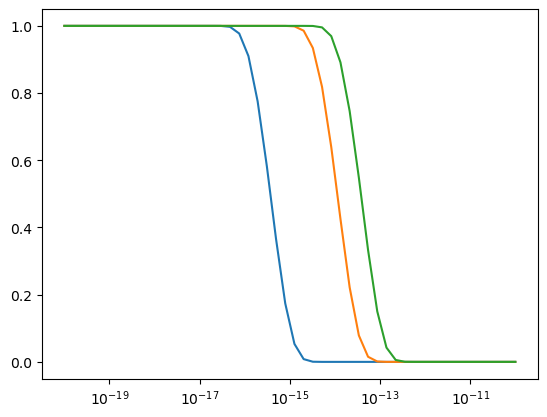

In [33]:
plt.subplots()

for thickness in np.linspace(0.001,0.010,3):
    params['a'] = params['b'] - thickness
    dp = []
    k_list = np.logspace(-20, -10, 50)
    for k in k_list:
        params['k'] = k
        u_all, epsilon_all, p_all, t, R = simulate(params)
        dp.append(p_all[-1,0] - p_all[-1,-1])
    dp = np.array(dp)

    plt.semilogx(k_list,dp)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming 'simulate' function and 'params' dictionary are defined as before.

# Define the initial parameters
params = {
    'K': 9e9,       # Bulk modulus (Pa)
    'G': 3e9,       # Shear modulus (Pa)
    'rho': 1000,    # Fluid density (kg/m^3)
    'g': 9.81,
    'alpha': 0.8,   # Biot's coefficient
    'S': 1e-10,     # Storage coefficient (1/Pa)
    'k': 1e-15,     # Permeability (m^2)
    'a': 0.015,     # Inner radius (m)
    'b': 0.016,     # Outer radius (m)
    'N_r': 100,     # Number of spatial grid points
    'N_t': 150,     # Number of time steps
    'T': 1000.0     # Total simulation time (s)
}

# Set global font size
plt.rcParams.update({'font.size': 16})

# Create a figure with GridSpec layout
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(2, 2, height_ratios=[1, 1])

# First row, left subplot
ax1 = fig.add_subplot(gs[0, 0])

# Run the simulation for the first permeability value
params['k'] = 1e-15  # Permeability for the first plot
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the pressure distribution
c1 = ax1.pcolormesh(R * 1e3, t, p_all, shading='auto')
ax1.set_xlabel('Radial Distance (mm)', fontsize=18)
ax1.set_ylabel('Time (s)', fontsize=18)
ax1.set_title(f'A. Pressure Distribution at k = {params["k"]:.1e} m²', fontsize=20)
cbar1 = fig.colorbar(c1, ax=ax1)
cbar1.set_label('Pressure (normalized to applied pressure)', fontsize=18)

# First row, right subplot
ax2 = fig.add_subplot(gs[0, 1])

# Run the simulation for the second permeability value
params['k'] = 1e-12  # Permeability for the second plot
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the pressure distribution
c2 = ax2.pcolormesh(R * 1e3, t, p_all, shading='auto')
ax2.set_xlabel('Radial Distance (mm)', fontsize=18)
ax2.set_ylabel('Time (s)', fontsize=18)
ax2.set_title(f'B. Pressure Distribution at k = {params["k"]:.1e} m²', fontsize=20)
cbar2 = fig.colorbar(c2, ax=ax2)
cbar2.set_label('Pressure (normalized to applied pressure)', fontsize=18)

# Second row, big subplot that spans both columns
ax3 = fig.add_subplot(gs[1, :])  # This spans both columns

# Plotting the pressure difference vs. permeability for varying thicknesses
thickness_list = np.linspace(0.001, 0.010, 3)  # Thickness values in meters
for thickness in thickness_list:
    params['a'] = params['b'] - thickness
    dp = []
    k_list = np.logspace(-20, -10, 50)
    for k in k_list:
        params['k'] = k
        u_all, epsilon_all, p_all, t, R = simulate(params)
        dp.append(p_all[-1, 0] - p_all[-1, -1])  # Pressure difference
    dp = np.array(dp)
    ax3.semilogx(k_list, dp, label=f'Thickness = {thickness * 1e3:.1f} mm')

ax3.set_xlabel('Permeability (m²)', fontsize=18)
ax3.set_ylabel('Pressure Difference', fontsize=18)
ax3.set_title('C. Pressure Difference vs. Permeability', fontsize=20)
ax3.legend(fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()